# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [4]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install --upgrade gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's 

## Importing the necessary libraries

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
#pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [8]:
# Import the first file - True.csv

df_true = pd.read_csv('/content/True.csv')


# Import the second file - Fake.csv

df_fake = pd.read_csv('/content/Fake.csv')
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [9]:
# Inspect the DataFrame with True News to understand the given data
df_true.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [10]:
df_true.isnull().sum()

title    0
text     0
date     0
dtype: int64

In [11]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [12]:
df_fake.isnull().sum()

title    21
text     21
date     42
dtype: int64

In [14]:
# Print the column details for True News DataFrame
print(df_true.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [15]:
# Print the column details for Fake News Dataframe
print(df_fake.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [16]:
# Print the column names of both DataFrames
print("df_fake columns:", df_fake.columns.tolist())
print("df_true columns:", df_true.columns.tolist())

df_fake columns: ['title', 'text', 'date']
df_true columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [17]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] =1
df_true.head()

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] =0
df_fake.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  \
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017   
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017   
2  On Friday, it was revealed that former Milwauk...  December 30, 2017   
3  On Christmas day, Donald Trump announced that ...  December 29, 2017   
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017   

   news_label  
0           0  
1           0  
2           0  
3           0  
4           0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [18]:
# Combine the true and fake news DataFrames into a single DataFrame
df_combined = pd.concat([df_fake, df_true], ignore_index=True)

In [19]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_combined.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  \
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017   
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017   
2  On Friday, it was revealed that former Milwauk...  December 30, 2017   
3  On Christmas day, Donald Trump announced that ...  December 29, 2017   
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017   

   news_label  
0           0  
1           0  
2           0  
3           0  
4           0

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [20]:
# Check Presence of Null Values
df_combined.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [21]:
# Handle Rows with Null Values
print(df_combined[df_combined[['title', 'text']].isnull().any(axis=1)])



      title text date  news_label
9732    NaN  NaN  NaN           0
12409   NaN  NaN  NaN           0
13365   NaN  NaN  NaN           0
17856   NaN  NaN  NaN           0
19630   NaN  NaN  NaN           0
21931   NaN  NaN  NaN           0
21942   NaN  NaN  NaN           0
21993   NaN  NaN  NaN           0
22030   NaN  NaN  NaN           0
22322   NaN  NaN  NaN           0
22368   NaN  NaN  NaN           0
22418   NaN  NaN  NaN           0
22531   NaN  NaN  NaN           0
22730   NaN  NaN  NaN           0
22741   NaN  NaN  NaN           0
22792   NaN  NaN  NaN           0
22829   NaN  NaN  NaN           0
23121   NaN  NaN  NaN           0
23167   NaN  NaN  NaN           0
23217   NaN  NaN  NaN           0
23330   NaN  NaN  NaN           0


In [22]:
df_combined = df_combined.dropna(subset=['title', 'text'])
df_combined.isnull().sum()

title          0
text           0
date          21
news_label     0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [23]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

df_combined['combined_text'] = df_combined['title'].fillna('') + ' ' + df_combined['text'].fillna('')

df_combined.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  \
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017   
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017   
2  On Friday, it was revealed that former Milwauk...  December 30, 2017   
3  On Christmas day, Donald Trump announced that ...  December 29, 2017   
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017   

   news_label                                      combined_text  
0           0   Donald Trump Sends Out Embarrassing New Year’...  
1           0   Drunk Bragging Trump Staffer Started Russian ...  
2           0   Sheriff David Clarke Becomes An Internet Joke...  
3           0   Trump Is So Obsessed He Even Has Obama’s Name...  
4           0   Pope Francis Just Called Out Donald Trump Dur...

In [24]:

# Display the first 5 rows of the updated DataFrame to check the result

#print(df_combined.head().to_string())
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          44919 non-null  object
 1   text           44919 non-null  object
 2   date           44898 non-null  object
 3   news_label     44919 non-null  int64 
 4   combined_text  44919 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [25]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

df_clean = df_combined[['combined_text', 'news_label']].copy()

# Add 'news_label' column to the new dataframe for topic identification

print(df_clean.head())

                                       combined_text  news_label
0   Donald Trump Sends Out Embarrassing New Year’...           0
1   Drunk Bragging Trump Staffer Started Russian ...           0
2   Sheriff David Clarke Becomes An Internet Joke...           0
3   Trump Is So Obsessed He Even Has Obama’s Name...           0
4   Pope Francis Just Called Out Donald Trump Dur...           0


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [26]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

import re
import string

def clean_news_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [28]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['cleannews'] = df_clean['combined_text'].apply(clean_news_text)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   combined_text  44898 non-null  object
 1   news_label     44898 non-null  int64 
 2   cleannews      44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [29]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

import spacy
from tqdm.notebook import tqdm

def batch_extract_nouns(texts, batch_size=500):
    results = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), total=len(texts)):
        nouns = [
            token.lemma_
            for token in doc
            if token.pos_ == "NOUN" and not token.is_stop and token.is_alpha
        ]
        results.append(' '.join(nouns))
    return results

In [30]:
df_clean.shape[0]

44919

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [27]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

texts = df_clean['cleannews'].fillna('').tolist()
df_clean['nouns_only'] = batch_extract_nouns(texts)

  0%|          | 0/44919 [00:00<?, ?it/s]

### Save the Cleaned data as a csv file (Recommended)

In [46]:
## Recommended to perform the below steps to save time while rerunning the code
#df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("/content/clean_df.csv")
df_clean = pd.read_csv("/content/clean_df.csv", on_bad_lines='skip')


In [47]:
# Check the first few rows of the DataFrame
df_clean['nouns_only'].head()

0    trump year eve message trump t year shout enem...
1    bragging trump staffer collusion investigation...
2    internet joke people eye homeland security sec...
3    trump website image day day row reality star p...
4    trump speech day message trump pope message da...
Name: nouns_only, dtype: object

In [48]:
# Check the dimensions of the DataFrame
df_clean.shape


(44919, 4)

In [49]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   combined_text  44919 non-null  object
 1   news_label     44919 non-null  int64 
 2   cleannews      44919 non-null  object
 3   nouns_only     44896 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [50]:
def to_token_list(x):
    if isinstance(x, str):
        return x.strip().split()
    elif isinstance(x, list):
        return x
    else:
        return []

df_clean['nouns_only'] = df_clean['nouns_only'].apply(to_token_list)


df_clean = df_clean[df_clean['nouns_only'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [51]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_clean, test_size=0.30, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [52]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleannews_len'] = df_clean['cleannews'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['nouns_only_len'] = df_clean['nouns_only'].str.len()


In [53]:
df_clean.head()

combined_text  news_label  \
0   Donald Trump Sends Out Embarrassing New Year’...           0   
1   Drunk Bragging Trump Staffer Started Russian ...           0   
2   Sheriff David Clarke Becomes An Internet Joke...           0   
3   Trump Is So Obsessed He Even Has Obama’s Name...           0   
4   Pope Francis Just Called Out Donald Trump Dur...           0   

                                           cleannews  \
0   donald trump sends out embarrassing new year’...   
1   drunk bragging trump staffer started russian ...   
2   sheriff david clarke becomes an internet joke...   
3   trump is so obsessed he even has obama’s name...   
4   pope francis just called out donald trump dur...   

                                          nouns_only  cleannews_len  \
0  [trump, year, eve, message, trump, t, year, sh...           2635   
1  [bragging, trump, staffer, collusion, investig...           1925   
2  [internet, joke, people, eye, homeland, securi...           3255   
3  [trump, website, image, day, day, row, reality...           2482   
4  [trump, speech, day, message, trump, pope, mes...           2377   

   nouns_only_len  
0              90  
1              80  
2             124  
3             103  
4              78

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

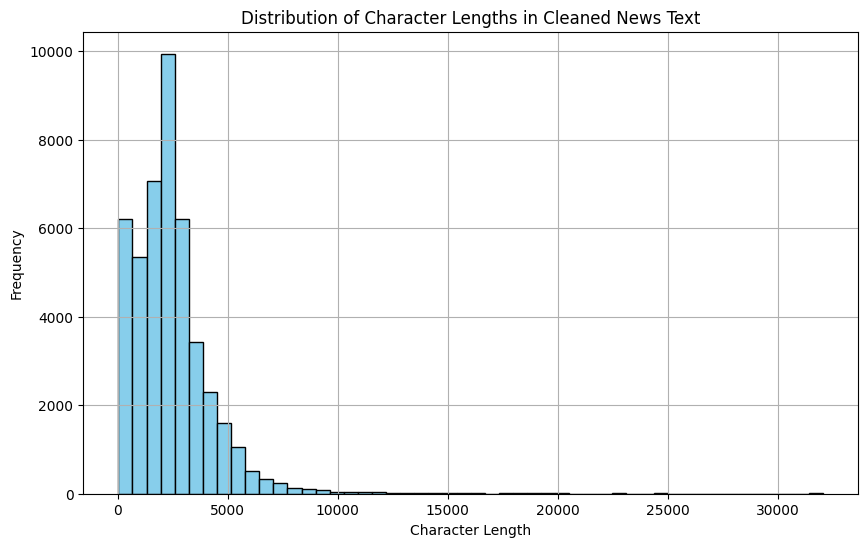

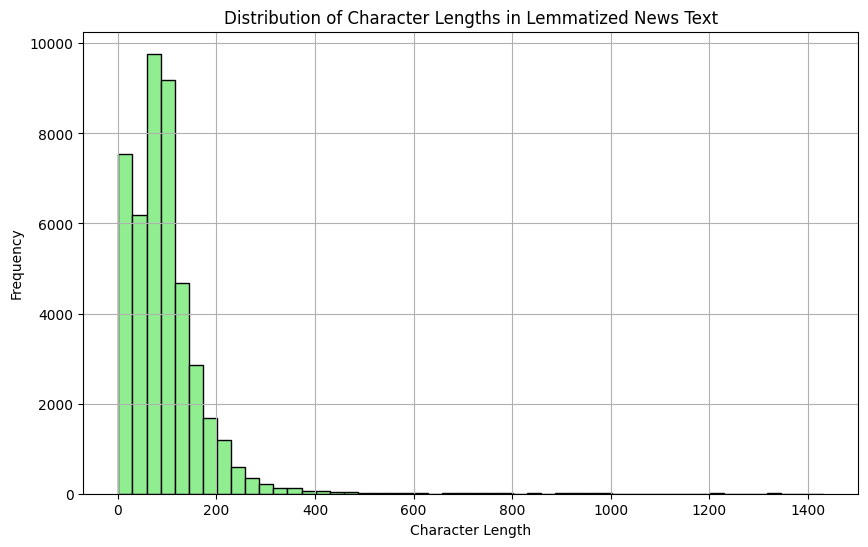

In [36]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_clean['cleannews_len'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Character Lengths in Cleaned News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Add histogram for lemmatized news text with POS tags removed

plt.figure(figsize=(10,6))
plt.hist(df_clean['nouns_only_len'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Character Lengths in Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

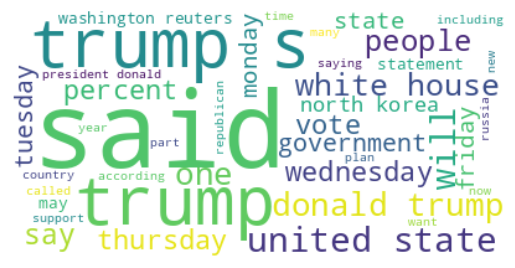

In [37]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

from wordcloud import WordCloud
true_news_train = train_df[train_df['news_label'] == True]
true_text = " ".join(true_news_train['cleannews'].dropna().astype(str))

# Generate word cloud for True News

wordcloud = WordCloud(max_words=40, background_color='white').generate(true_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

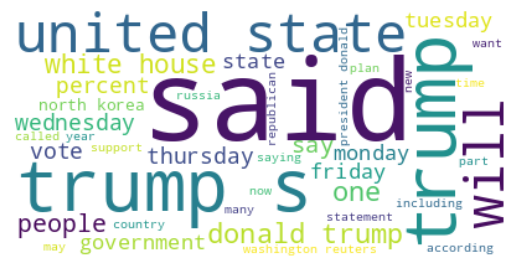

In [38]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
from wordcloud import WordCloud
false_news_train = train_df[train_df['news_label'] == True]
false_text = " ".join(false_news_train['cleannews'].dropna().astype(str))


# Generate word cloud for Fake News
wordcloud = WordCloud(max_words=40, background_color='white').generate(false_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [39]:
# Write a function to get the specified top n-grams

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(texts, n=20, ngram_range=(1,1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(texts)
    counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame({'ngram': vocab, 'frequency': counts})
    return ngram_freq.sort_values(by='frequency', ascending=False).head(n).reset_index(drop=True)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [40]:
# Handle NaN values in the text data
true_text_Nan = pd.Series(true_text).dropna().astype(str)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

        ngram  frequency
0        said      69772
1       trump      41779
2     reuters      19993
3   president      19031
4       state      14385
5  government      13144
6       house      12651
7         new      12465
8      states      11719
9  republican      11163


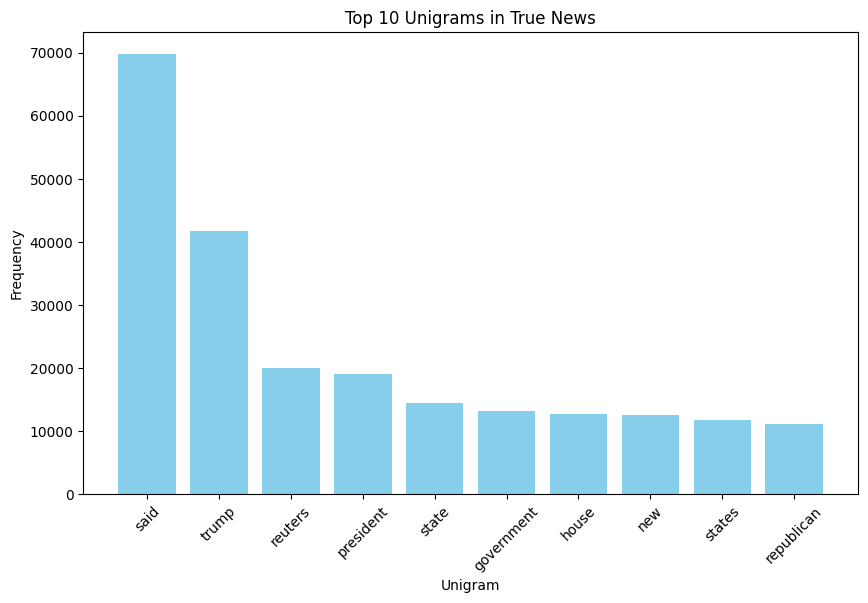

In [41]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(true_text_Nan, n=10, ngram_range=(1,1))

print(top_unigrams)
plt.figure(figsize=(10,6))
plt.bar(top_unigrams['ngram'], top_unigrams['frequency'], color='skyblue')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                ngram  frequency
0       united states       8547
1        donald trump       7184
2         white house       6468
3         north korea       4586
4  washington reuters       4516
5    president donald       4195
6            new york       3194
7      prime minister       2944
8      said statement       2756
9       islamic state       2604


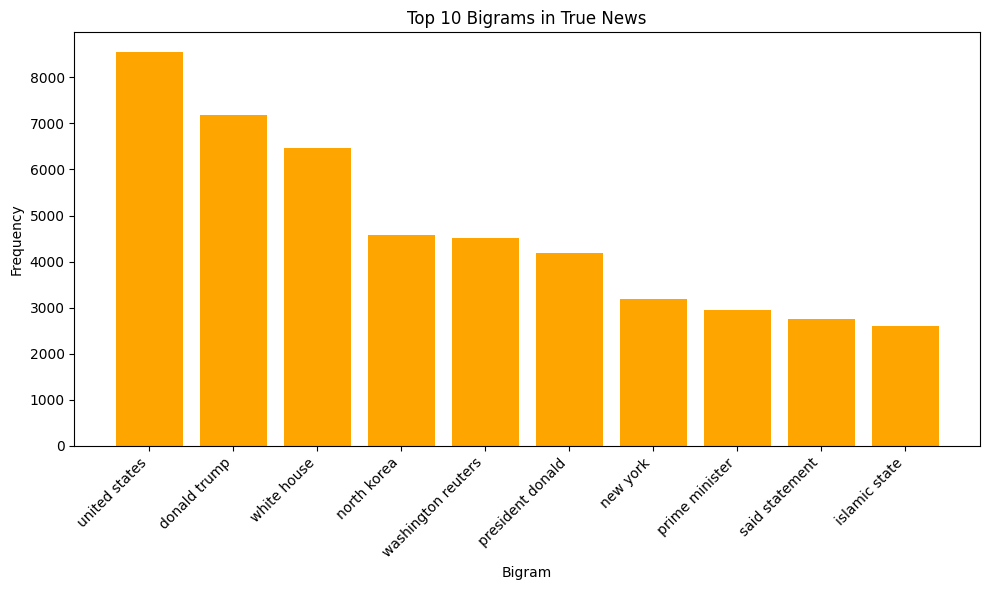

In [42]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

top_bigrams = get_top_ngrams(true_text_Nan, n=10, ngram_range=(2,2))

print(top_bigrams)

plt.figure(figsize=(10,6))
plt.bar(top_bigrams['ngram'], top_bigrams['frequency'], color='orange')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  frequency
0        president donald trump       4152
1        president barack obama       2003
2      reuters president donald       1103
3  washington reuters president        934
4              white house said        693
5   presidentelect donald trump        571
6      president vladimir putin        564
7              new york reuters        507
8           state rex tillerson        486
9           secretary state rex        485


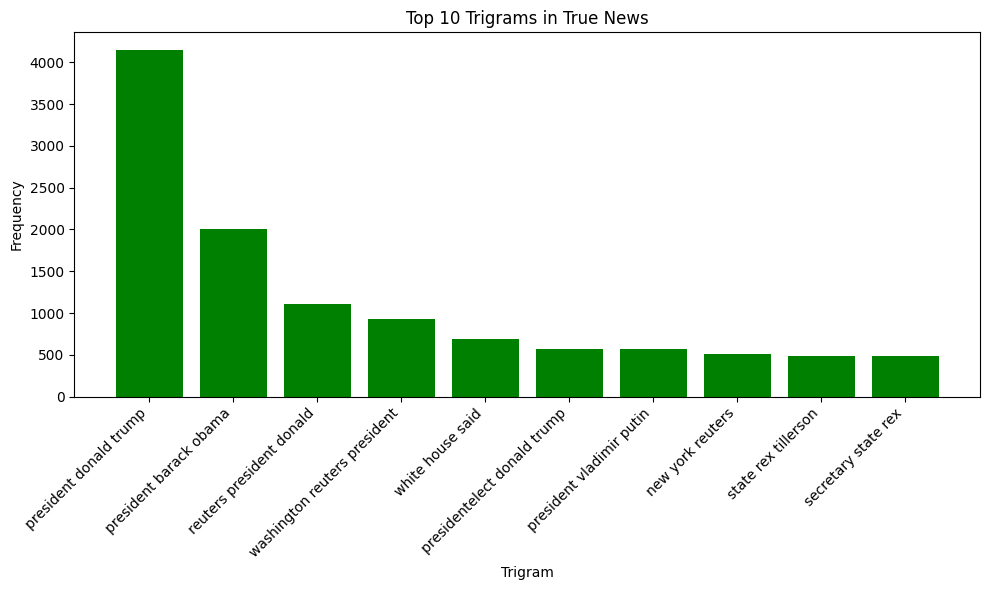

In [43]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_trigrams = get_top_ngrams(true_text_Nan, n=10, ngram_range=(3,3))

# Print them
print(top_trigrams)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_trigrams['ngram'], top_trigrams['frequency'], color='green')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

        ngram  frequency
0        said      69772
1       trump      41779
2     reuters      19993
3   president      19031
4       state      14385
5  government      13144
6       house      12651
7         new      12465
8      states      11719
9  republican      11163


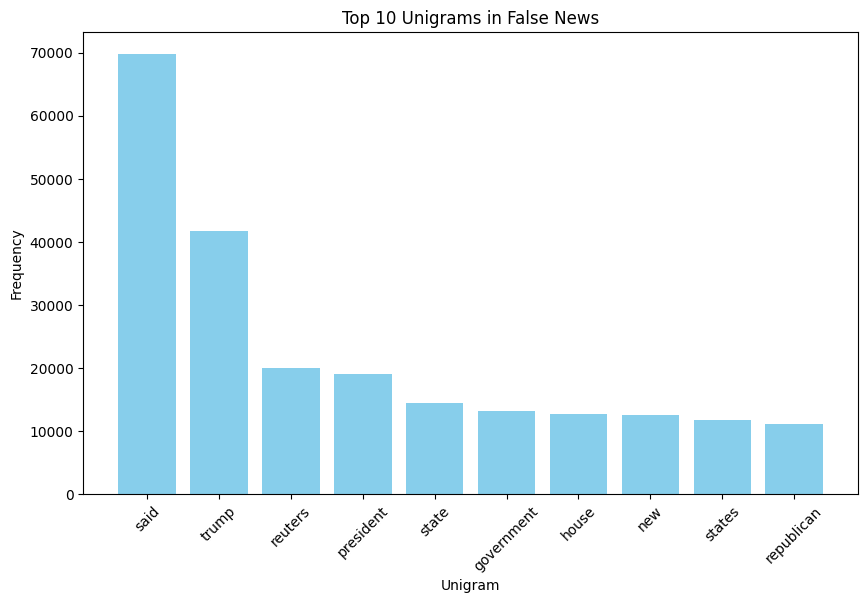

In [44]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
false_text_Nan = pd.Series(false_text).dropna().astype(str)
top_unigrams = get_top_ngrams(false_text_Nan, n=10, ngram_range=(1,1))

print(top_unigrams)
plt.figure(figsize=(10,6))
plt.bar(top_unigrams['ngram'], top_unigrams['frequency'], color='skyblue')
plt.title('Top 10 Unigrams in False News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                ngram  frequency
0       united states       8547
1        donald trump       7184
2         white house       6468
3         north korea       4586
4  washington reuters       4516
5    president donald       4195
6            new york       3194
7      prime minister       2944
8      said statement       2756
9       islamic state       2604


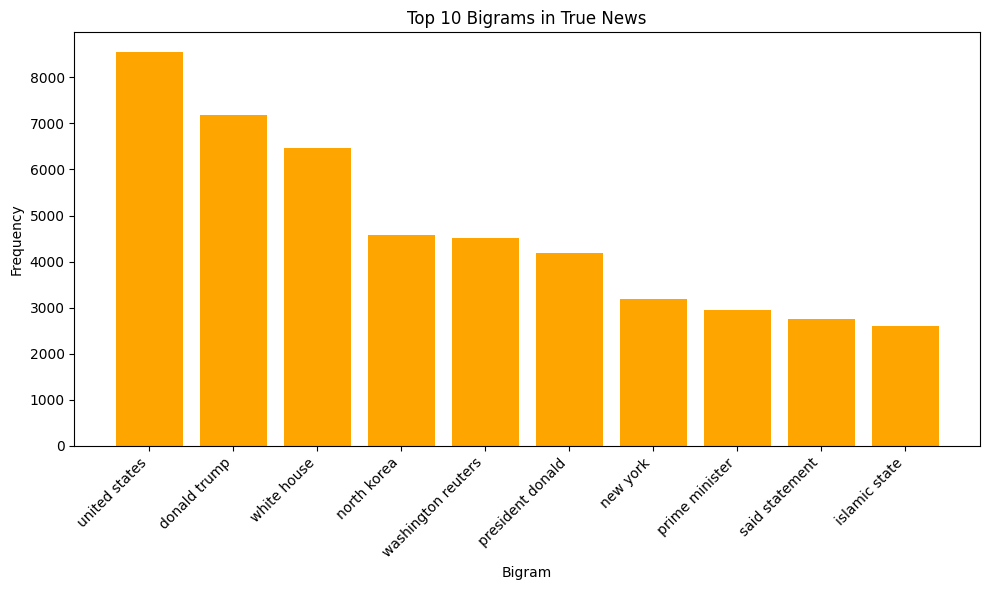

In [45]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams = get_top_ngrams(false_text_Nan, n=10, ngram_range=(2,2))

print(top_bigrams)

plt.figure(figsize=(10,6))
plt.bar(top_bigrams['ngram'], top_bigrams['frequency'], color='orange')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  frequency
0        president donald trump       4152
1        president barack obama       2003
2      reuters president donald       1103
3  washington reuters president        934
4              white house said        693
5   presidentelect donald trump        571
6      president vladimir putin        564
7              new york reuters        507
8           state rex tillerson        486
9           secretary state rex        485


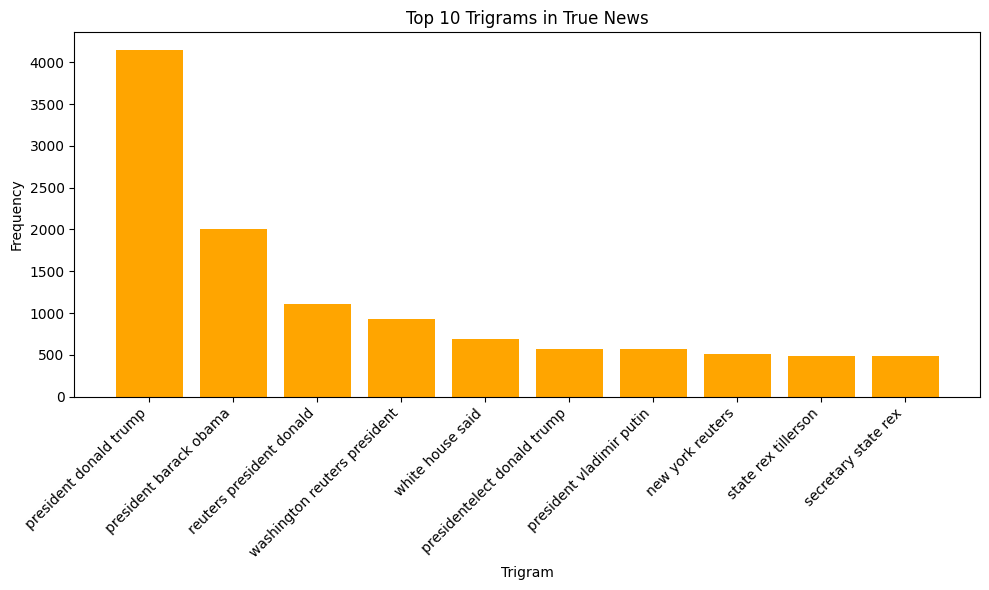

In [46]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_Trigrams = get_top_ngrams(true_text_Nan, n=10, ngram_range=(3,3))

print(top_Trigrams)

plt.figure(figsize=(10,6))
plt.bar(top_Trigrams['ngram'], top_Trigrams['frequency'], color='orange')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [1]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [3]:
#model.save("word2vec-google-news-300.model")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [15]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from gensim.models import Word2Vec

def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

model = Word2Vec(sentences=train_df['nouns_only'].tolist(), vector_size=100, window=5, min_count=1, workers=4)


X_train_vecs = np.array([get_avg_vector(tokens, model) for tokens in train_df['nouns_only']])
X_test_vecs = np.array([get_avg_vector(tokens, model) for tokens in test_df['nouns_only']])



## Extract the target variable for the training data and validation data
print("Training labels shape:", X_train_vecs.shape)
print("Validation labels shape:", X_test_vecs.shape)
print("Sample labels:", X_train_vecs[:5])


Training labels shape: (31427, 100)
Validation labels shape: (13469, 100)
Sample labels: [[-0.27712852 -0.05865697  0.2644112   0.29480392  0.24030454 -0.45780054
  -0.09180682  0.9651053  -0.76572615 -0.5947467   0.5996265  -0.4661295
  -0.30160433 -0.4220962  -0.31767935 -0.3411097  -0.12483377 -0.8790893
  -0.45174968 -0.8643662   0.03559456  0.22126637  0.7603988  -0.36196774
  -0.2274062  -0.7726546   0.5504617  -0.41767612 -0.65750146  0.21293303
   0.60127556 -0.11175662  0.08253853 -0.21344326 -0.00794498  0.31993753
   0.573717   -1.1965626   0.13568014 -1.069141   -0.40096837 -0.15344746
   0.2062574  -0.7289277   1.071511    0.30879796 -0.12198581  0.02491178
   0.6048474   0.15384826  0.27218345 -0.5045985   0.22474971 -0.16381496
  -0.96580374 -0.05831799 -0.03519767  0.34533942 -0.58534276 -0.4202542
   1.1024455  -0.13948914  0.3016378  -0.2970765  -1.1626385   0.10382558
   0.20764042  0.11515675 -0.4784481  -0.93600744  0.1519472   0.57566416
   0.0391195   0.36478105 

In [36]:
y_train = train_df['news_label'].values
y_test = test_df['news_label'].values


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [34]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
logreg_model.fit(X_train_vecs, y_train)

## Predict on validation data
y_pred = logreg_model.predict(X_test_vecs)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [37]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))
# Optional detailed view

Accuracy : 0.927
Precision: 0.9266
Recall   : 0.9272
F1 Score : 0.9268


In [38]:
# Classification Report
from sklearn.metrics import classification_report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7107
           1       0.92      0.93      0.92      6362

    accuracy                           0.93     13469
   macro avg       0.93      0.93      0.93     13469
weighted avg       0.93      0.93      0.93     13469



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [39]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
model.fit(X_train_vecs, y_train)

## Predict on validation data
y_val_pred = model.predict(X_test_vecs)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [40]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics on validation data
accuracy = accuracy_score(y_test, y_val_pred)
precision = precision_score(y_test, y_val_pred, average='macro')
recall = recall_score(y_test, y_val_pred, average='macro')
f1 = f1_score(y_test, y_val_pred, average='macro')

# Print results
print("Validation Accuracy:", accuracy)
print("Validation Precision (macro):", precision)
print("Validation Recall (macro):", recall)
print("Validation F1 Score (macro):", f1)

Validation Accuracy: 0.8853663969114263
Validation Precision (macro): 0.8855129353172257
Validation Recall (macro): 0.8844214366051562
Validation F1 Score (macro): 0.8848648161447749


In [41]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_val_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7107
           1       0.89      0.87      0.88      6362

    accuracy                           0.89     13469
   macro avg       0.89      0.88      0.88     13469
weighted avg       0.89      0.89      0.89     13469



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [55]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train_vecs, y_train)

## Predict on validation data
y_val_pred = rf_model.predict(X_test_vecs)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [56]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_val_pred)
precision = precision_score(y_test, y_val_pred, average='macro')
recall = recall_score(y_test, y_val_pred, average='macro')
f1 = f1_score(y_test, y_val_pred, average='macro')

# Print the results
print("Validation Accuracy:", accuracy)
print("Validation Precision (macro):", precision)
print("Validation Recall (macro):", recall)
print("Validation F1 Score (macro):", f1)

Validation Accuracy: 0.9348132749276116
Validation Precision (macro): 0.9349277647290224
Validation Recall (macro): 0.9342754510067448
Validation F1 Score (macro): 0.9345665915668072


In [57]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_val_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7107
           1       0.94      0.92      0.93      6362

    accuracy                           0.93     13469
   macro avg       0.93      0.93      0.93     13469
weighted avg       0.93      0.93      0.93     13469



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.


### We evaluated three machine learning models—Random Forest, Logistic Regression,
### and Decision Tree—for fake news detection using Word2Vec-based semantic features.
### Among them, Random Forest achieved the highest performance across all metrics,
### demonstrating strong accuracy and balanced classification of both fake and real news.

## **Best Performing Model: Random Forest**

### • Accuracy       : 93.48%
### • F1 Score (macro): 93.46%
### • Outperformed both Logistic Regression and Decision Tree
### • Effectively handled complex word patterns using Word2Vec embeddings

## **Evaluation Metric Used**

## • Macro-averaged F1 Score was prioritized
## • Gives equal importance to both fake and real news
## • Ideal for maintaining balanced performance across classes


## **Overall Impact**

## • Semantic classification (Word2Vec) greatly improved model performance
## • Random Forest + Word2Vec proved to be the most robust approach
## • Provides a strong base for building real-world fake news detection tools
